# ML-Physics, Sheet 11
Leonard Benkendorff, Dorothea Schwärzel, Sebastian Preuß

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
from torch import Tensor
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

## 1 Positional Encoding
### a)
\begin{figure}[H]
\includegraphics[width=\textwidth]{1a}
\end{figure}

### b)

$E \in \mathbb{R}^{p\times n}$

$E_{(2k), i} = \sin\left(i \cdot \exp\left(-\frac{2k \cdot \log(10000)}{5000}\right)\right)$

$E_{(2k+1), i} = \cos\left(i \cdot \exp\left(-\frac{2k \cdot \log(10000)}{5000}\right)\right)$

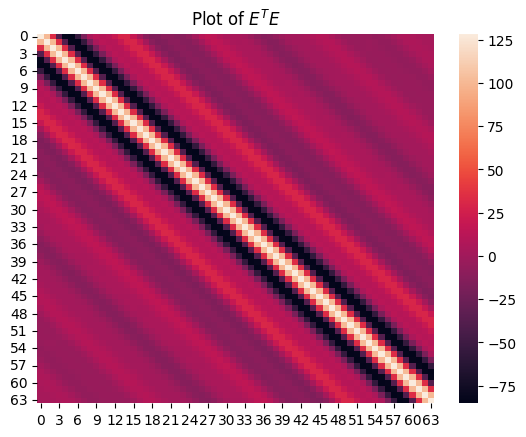

In [4]:
import seaborn as sns

def get_E(n, p):
    i = np.arange(n)+1
    k = np.arange(p)+1
    
    E = np.zeros((p,n))
    ii, kk = np.meshgrid(i,k)
    
    E1 = np.sin(ii*np.exp(-2*kk*np.log(10000)/5000))
    E2 = np.cos(ii*np.exp(-2*kk*np.log(10000)/5000))
    E[k % 2 == 0,:] = E1[k % 2 == 0,:]
    E[k % 2 == 1,:] = E2[k % 2 == 1,:]
    return E

def get_score(E, X, mode='cat'):
    if mode=='add':
        Q = E + X
        return Q.T @ Q
    elif mode=='cat':
        Q = np.append(E, X, axis=0)
        print(Q.shape)
        return Q.T @ Q
    else:
        print('You did something wrong.')
        return

E = get_E(64,256)
#print(E.shape)
X = np.random.normal(0.0, np.std(E), size=(256,64))
plt.title('Plot of $E^TE$')
sns.heatmap(E.T @ E)
plt.show()

**Our observation:** We observe a strong score along the diagonal and decreasing, oscillating strenghts when moving away from the main diagonal.

### c)
We plot $K^TQ$ for random features $X$ for concatenation and addition with $E$.

(512, 64)


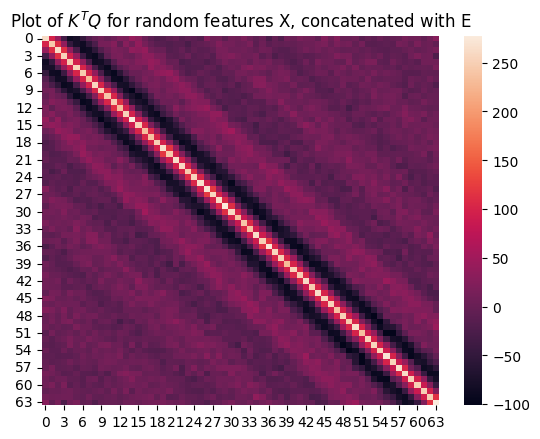

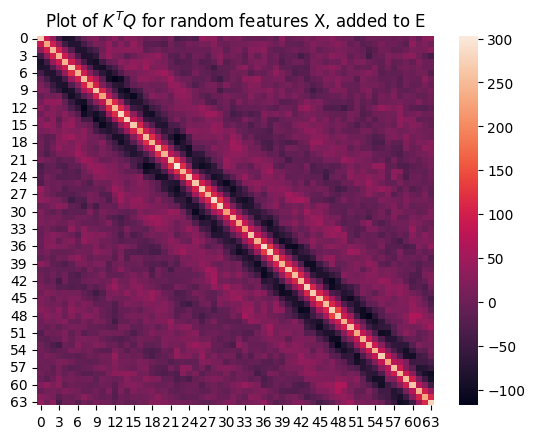

In [5]:
plt.title('Plot of $K^TQ$ for random features X, concatenated with E')
sns.heatmap(get_score(E,X, mode='cat'))
plt.show()
plt.title('Plot of $K^TQ$ for random features X, added to E')
sns.heatmap(get_score(E,X, mode='add'))
plt.show()

### d)
\begin{figure}[H]
\includegraphics[width=\textwidth]{1d}
\end{figure}

## 2 Interpolating between Aggregation functions
### a)
\begin{figure}[H]
\includegraphics[width=\textwidth]{2a}
\end{figure}

### b)
\begin{figure}[H]
\includegraphics[width=\textwidth]{2b}
\end{figure}

### c)
\begin{figure}[H]
\includegraphics[width=\textwidth]{2c}
\end{figure}

**Our observation:** We observe that both score matrices look essentially the same. The scaling is a bit different, but the distribution is the same: A very strong score on the main diagonal and then a decaying score when moving away from this diagonal, which oscillates.

## 3 Observing Oversmoothing

We did not attempt to do exercise 3a,b